In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
df = pd.read_excel("top goals.xlsx")
df.to_csv("top_goals.csv", index=False)
df1 = df.copy()

In [102]:
df.head()

,Season,Rank,Player,Club,Goals,IsTop10,Position,Age,Appearances,Goals_prev_season,Assists,Penalty_Goals,Non-Penalty_Goals,Goals_per_90,Big_6_Club_Feature,Club_League_Rank,Club_Total_Goals,League_Goals_per_Match,Games_in_Season
0,2023-24,1,Erling Haaland,Manchester City,27,1,Forward,23,31,36.0,6.0,1.0,26,0.85,1.0,1,96,2.83,38.0
1,2023-24,2,Cole Palmer,Chelsea,22,1,Attacking Midfielder,22,33,3.0,11.0,9.0,13,0.61,1.0,6,77,2.83,38.0
2,2023-24,3,Alexander Isak,Newcastle United,21,1,Forward,24,30,10.0,2.0,5.0,16,0.76,0.0,7,85,2.83,38.0
3,2023-24,4,Ollie Watkins,Aston Villa,19,1,Forward,28,37,15.0,13.0,0.0,19,0.51,0.0,4,76,2.83,38.0
4,2023-24,4,Dominic Solanke,AFC Bournemouth,19,1,Forward,26,38,6.0,3.0,1.0,18,0.50,0.0,12,54,2.83,38.0


In [103]:
df.columns

Index(['Season', 'Rank', 'Player', 'Club', 'Goals', 'IsTop10', 'Position',
       'Age', 'Appearances', 'Goals_prev_season', 'Assists', 'Penalty_Goals',
       'Non-Penalty_Goals', 'Goals_per_90', 'Big_6_Club_Feature',
       'Club_League_Rank', 'Club_Total_Goals', 'League_Goals_per_Match',
       'Games_in_Season'],
      dtype='object')

In [104]:
df.isnull().sum()

Season                      0
Rank                        0
Player                      0
Club                        0
Goals                       0
IsTop10                     0
Position                    0
Age                         0
Appearances                 0
Goals_prev_season         115
Assists                   228
Penalty_Goals               1
Non-Penalty_Goals           0
Goals_per_90                0
Big_6_Club_Feature          0
Club_League_Rank            0
Club_Total_Goals            0
League_Goals_per_Match      0
Games_in_Season             0
dtype: int64

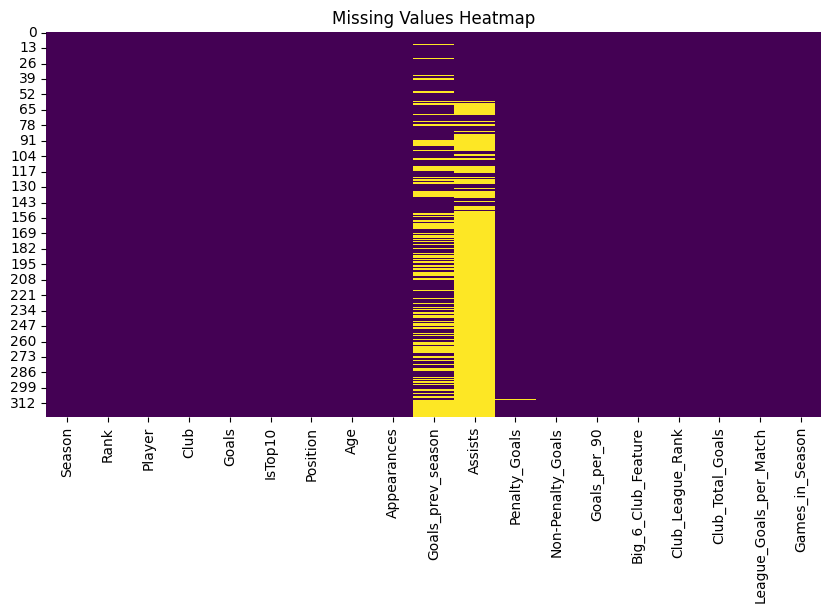

In [105]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [106]:
df = df.dropna(subset=['Assists'])

In [107]:
df['Goals_prev_season'] = df['Goals_prev_season'].fillna(df['Goals_prev_season'].median())

In [108]:
df['Penalty_Goals'] = df['Penalty_Goals'].fillna(df['Penalty_Goals'].mode()[0])


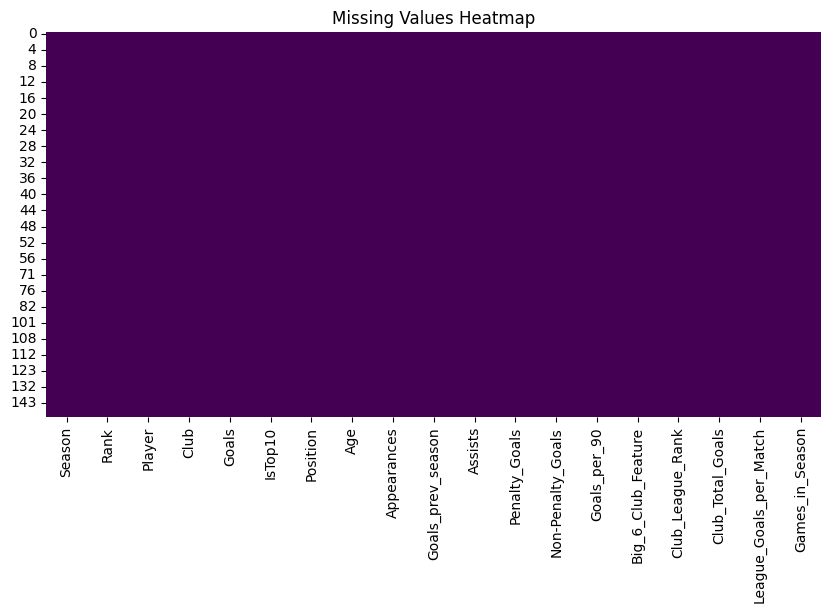

In [109]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [110]:
unwanted_cols = ['Season', 'Player', 'Club']  
df = df.drop(columns=unwanted_cols, errors='ignore')
df.columns

Index(['Rank', 'Goals', 'IsTop10', 'Position', 'Age', 'Appearances',
       'Goals_prev_season', 'Assists', 'Penalty_Goals', 'Non-Penalty_Goals',
       'Goals_per_90', 'Big_6_Club_Feature', 'Club_League_Rank',
       'Club_Total_Goals', 'League_Goals_per_Match', 'Games_in_Season'],
      dtype='object')

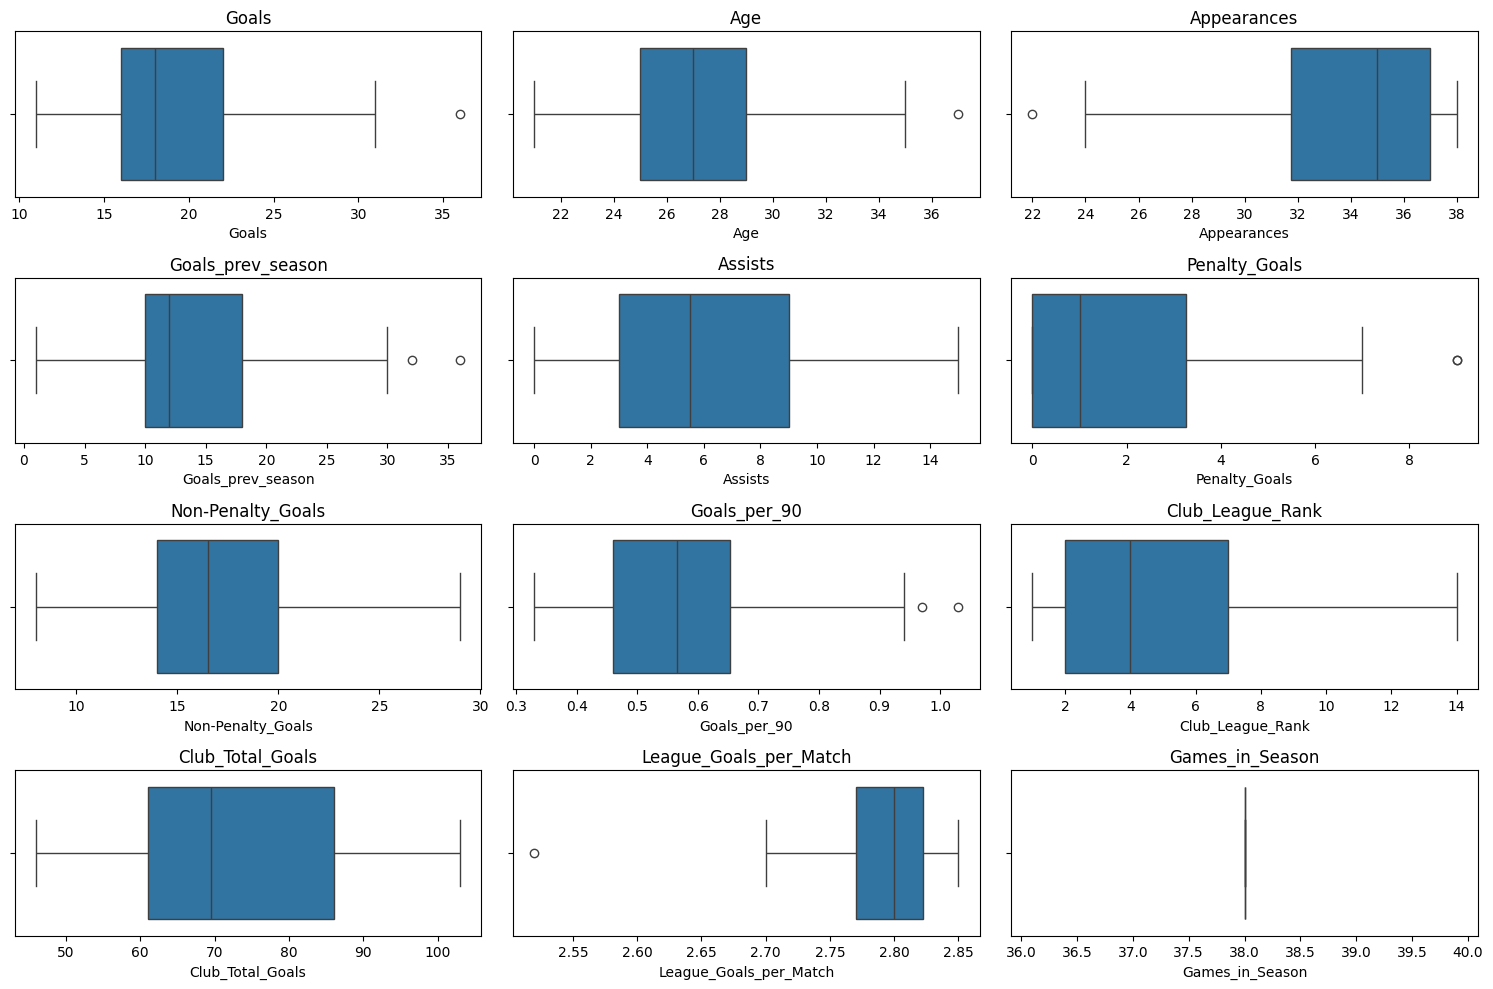

In [111]:
numeric_cols = ['Goals','Age','Appearances','Goals_prev_season',
                'Assists','Penalty_Goals','Non-Penalty_Goals',
                'Goals_per_90','Club_League_Rank','Club_Total_Goals',
                'League_Goals_per_Match','Games_in_Season']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

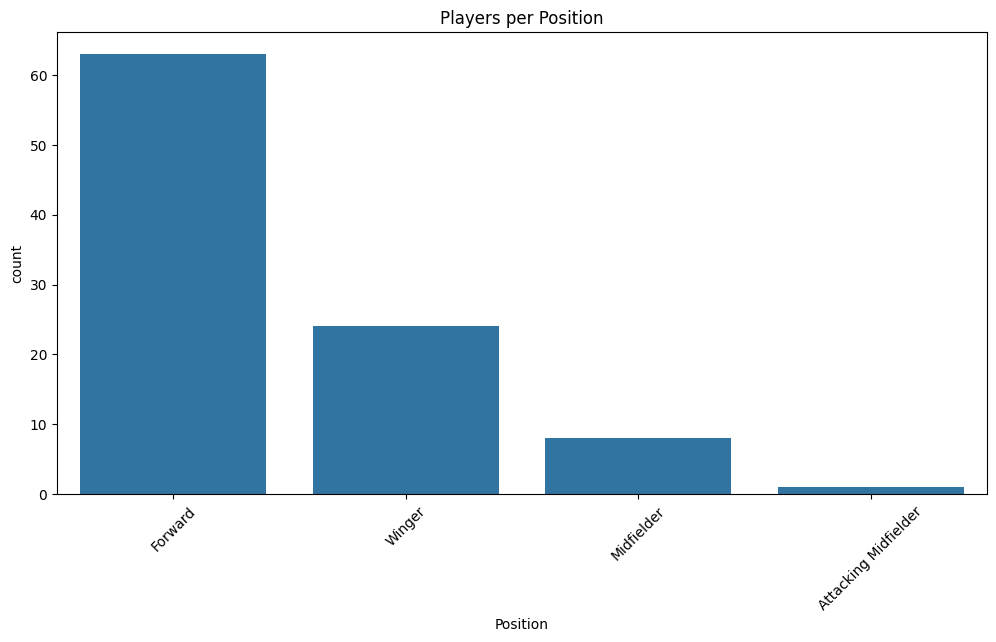

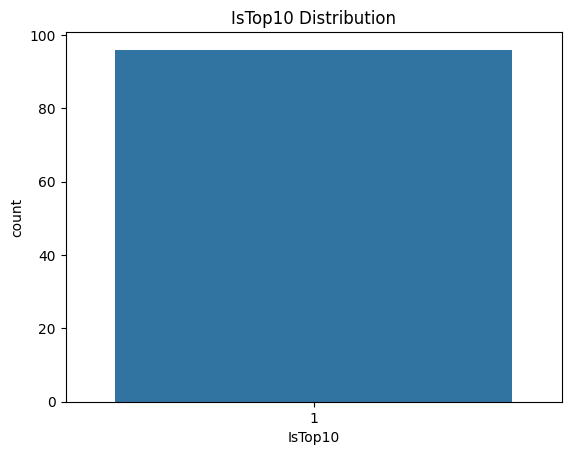

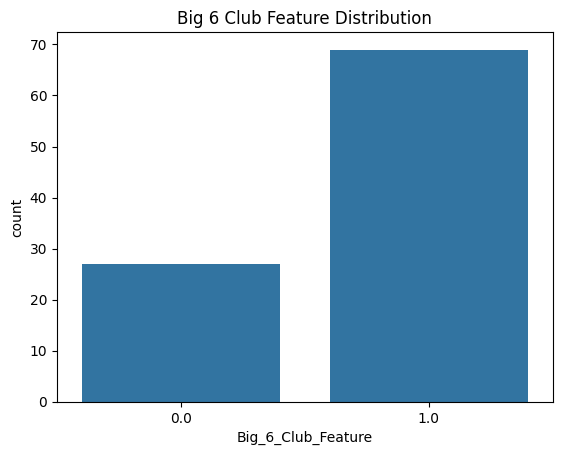

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Position", order=df['Position'].value_counts().index)
plt.title("Players per Position")
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x="IsTop10")
plt.title("IsTop10 Distribution")
plt.show()

sns.countplot(data=df, x="Big_6_Club_Feature")
plt.title("Big 6 Club Feature Distribution")
plt.show()


In [113]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

C:\Users\srias\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


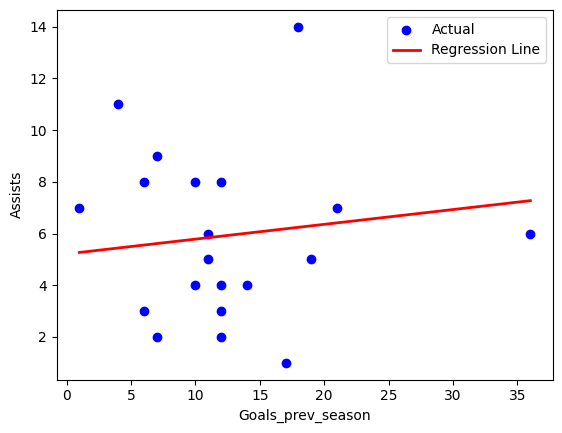

In [115]:
feature = "Goals_prev_season"
X_single = df[[feature]]
y = df["Assists"]

X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color="blue", label="Actual")
X_sorted = np.sort(X_test.values.reshape(-1, 1), axis=0)
y_sorted = model.predict(X_sorted)
plt.plot(X_sorted, y_sorted, color="red", linewidth=2, label="Regression Line")

plt.xlabel(feature)
plt.ylabel("Assists")
plt.legend()
plt.show()

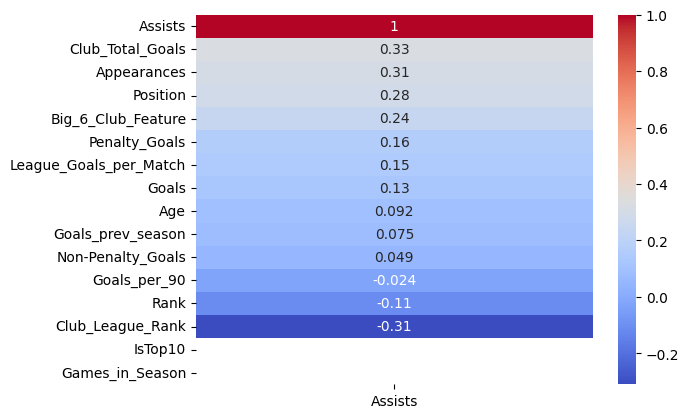

In [91]:
corr = df.corr(numeric_only=True) 
sns.heatmap(corr[['Assists']].sort_values(by='Assists', ascending=False), annot=True, cmap="coolwarm")
plt.show()

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²  :", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE : 3.309325023750759
RMSE: 3.9698256158275007
R²  : -0.5716295607160506


Correlations with Assists:
 Assists                   1.000000
Club_Total_Goals          0.328540
Appearances               0.306306
Position                  0.284811
Big_6_Club_Feature        0.238099
Penalty_Goals             0.163789
League_Goals_per_Match    0.145721
Goals                     0.125937
Age                       0.091536
Goals_prev_season         0.074731
Non-Penalty_Goals         0.048624
Goals_per_90             -0.023615
Rank                     -0.111540
Club_League_Rank         -0.309596
IsTop10                        NaN
Games_in_Season                NaN
Name: Assists, dtype: float64


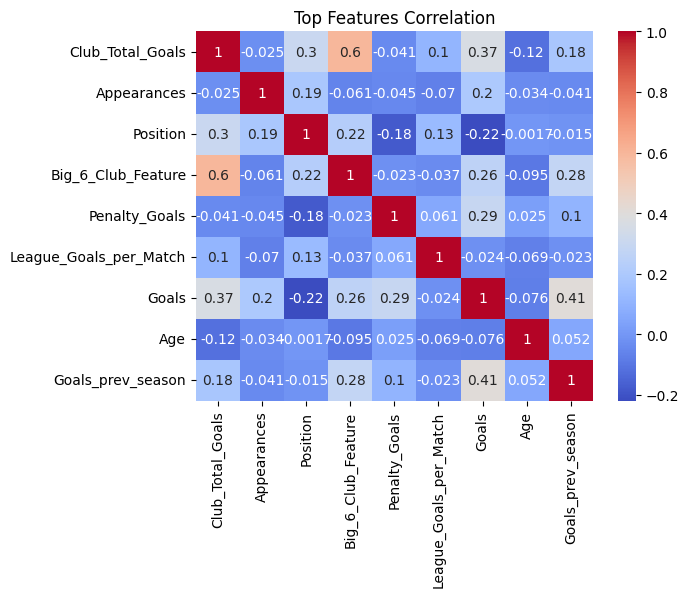

In [93]:
corr = df.corr(numeric_only=True)['Assists'].sort_values(ascending=False)
print("Correlations with Assists:\n", corr)
top_features = corr[1:10].index 
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Top Features Correlation")
plt.show()

In [94]:
# drop_cols = ['Season','Rank','Player','Club',
#              'Non-Penalty_Goals','Goals_per_90',
#              'Club_League_Rank','IsTop10','Games_in_Season']

# df = df.drop(columns=drop_cols)
df.columns

Index(['Rank', 'Goals', 'IsTop10', 'Position', 'Age', 'Appearances',
       'Goals_prev_season', 'Assists', 'Penalty_Goals', 'Non-Penalty_Goals',
       'Goals_per_90', 'Big_6_Club_Feature', 'Club_League_Rank',
       'Club_Total_Goals', 'League_Goals_per_Match', 'Games_in_Season'],
      dtype='object')

In [95]:
X = df.drop(columns=['Assists'])
y = df['Assists']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²  :", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE : 2.1807499999999997
RMSE: 3.004552587324775
R²  : 0.09974208426826214


Classification Report:

              precision    recall  f1-score   support

        High       0.67      0.80      0.73        10
         Low       0.25      0.20      0.22         5
      Medium       0.50      0.40      0.44         5

    accuracy                           0.55        20
   macro avg       0.47      0.47      0.46        20
weighted avg       0.52      0.55      0.53        20



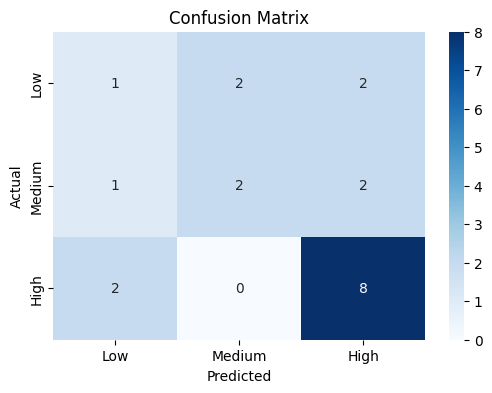

Top Features by Importance:
 Appearances           0.193406
Club_Total_Goals      0.184664
Goals                 0.163424
Age                   0.157922
Goals_prev_season     0.145678
Penalty_Goals         0.091462
Position              0.041652
Big_6_Club_Feature    0.021792
dtype: float64


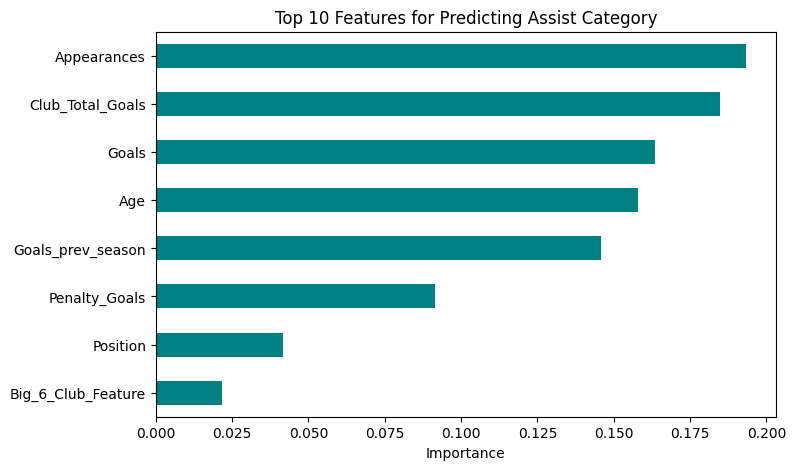

In [99]:
bins = [-1, 2, 5, np.inf] 
labels = ['Low','Medium','High']
# drop_cols = ['Season','Rank','Player','Club',
#              'Non-Penalty_Goals','Goals_per_90',
#              'Club_League_Rank','IsTop10','Games_in_Season']
# df1.drop(columns=drop_cols, inplace=True)

df1['Goals_prev_season'] = df1['Goals_prev_season'].fillna(df1['Goals_prev_season'].median())
df1['Penalty_Goals'] = df1['Penalty_Goals'].fillna(df1['Penalty_Goals'].mode()[0])
df1.dropna(subset=['Assists'], inplace=True) 

df1['Assists_cat'] = pd.cut(df1['Assists'], bins=bins, labels=labels)

cat_cols = df1.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != 'Assists_cat'] 
le = LabelEncoder()
for col in cat_cols:
    df1[col] = le.fit_transform(df1[col])

X = df1[['Goals', 'Appearances', 'Age', 'Position',
         'Big_6_Club_Feature', 'Club_Total_Goals', 
         'Goals_prev_season', 'Penalty_Goals']]
y = df1['Assists_cat']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['Low','Medium','High'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features by Importance:\n", importances.head(10))

plt.figure(figsize=(8,5))
importances.head(10).plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Features for Predicting Assist Category")
plt.show()
